In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Importing data
df = pd.read_csv(r'C:\Users\Mr Amir Mufti\Downloads\WH_Dataset.csv')

In [4]:
# Checking Data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [5]:
# Inspecting Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [19]:
# Checking Null Values
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [27]:
df2 = df[df['year'] == 2023].copy()

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      138 non-null    object 
 1   year                              138 non-null    int64  
 2   Life Ladder                       138 non-null    float64
 3   Log GDP per capita                129 non-null    float64
 4   Social support                    138 non-null    float64
 5   Healthy life expectancy at birth  135 non-null    float64
 6   Freedom to make life choices      136 non-null    float64
 7   Generosity                        129 non-null    float64
 8   Perceptions of corruption         131 non-null    float64
 9   Positive affect                   138 non-null    float64
 10  Negative affect                   138 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 12.9+ KB


In [32]:
df2 = df2.dropna(axis=0)

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 30 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      120 non-null    object 
 1   year                              120 non-null    int64  
 2   Life Ladder                       120 non-null    float64
 3   Log GDP per capita                120 non-null    float64
 4   Social support                    120 non-null    float64
 5   Healthy life expectancy at birth  120 non-null    float64
 6   Freedom to make life choices      120 non-null    float64
 7   Generosity                        120 non-null    float64
 8   Perceptions of corruption         120 non-null    float64
 9   Positive affect                   120 non-null    float64
 10  Negative affect                   120 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 11.2+ KB


In [36]:
# Creating a copy of dataframe with only relevant columns
##df3 = df2[['Life Ladder', 'Social support']].copy()

In [37]:
# Checking the dataset
##df3.head()

,Life Ladder,Social support
30,5.444691,0.690753
63,6.393229,0.892118
80,5.679090,0.819338
97,7.024582,0.896460
113,6.635664,0.874427


In [39]:
##df3.dropna(axis = 0)

,Life Ladder,Social support
30,5.444691,0.690753
63,6.393229,0.892118
80,5.679090,0.819338
97,7.024582,0.896460
113,6.635664,0.874427
...,...,...
2260,6.661722,0.908374
2277,6.385361,0.908859
2313,6.325115,0.844905
2344,3.685568,0.664099


C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


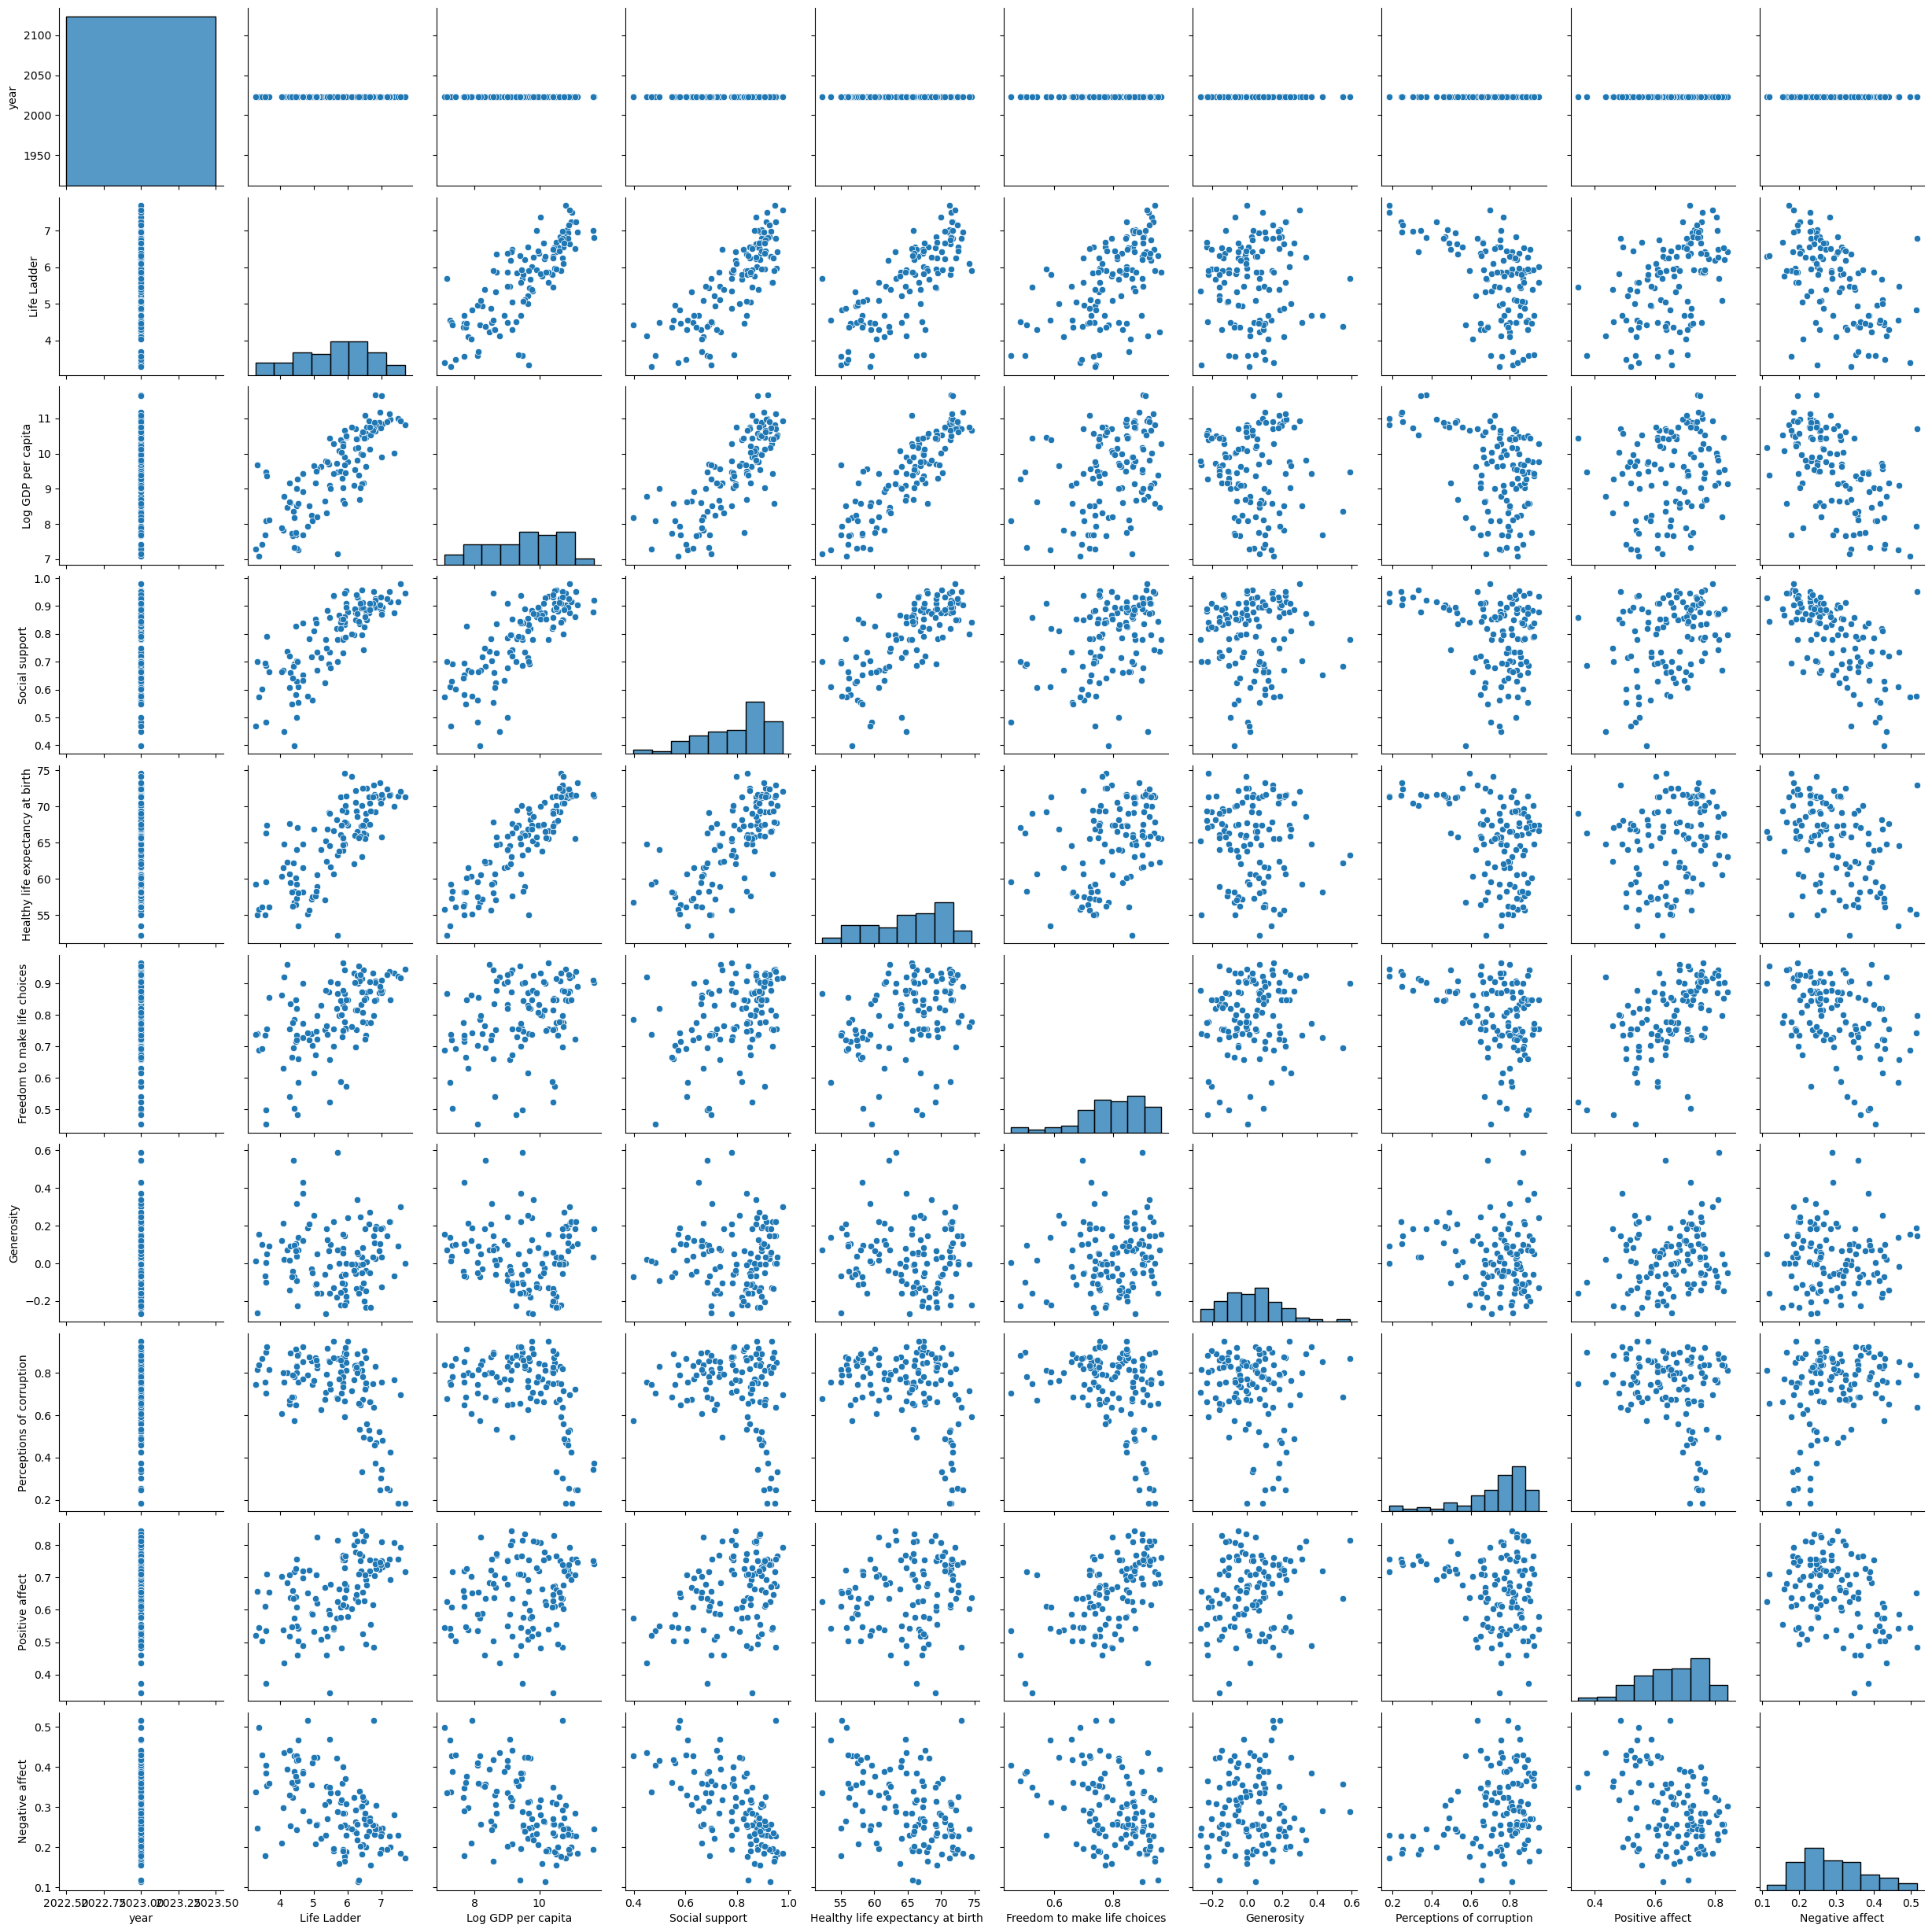

In [53]:
sns.pairplot(df2)
plt.show()

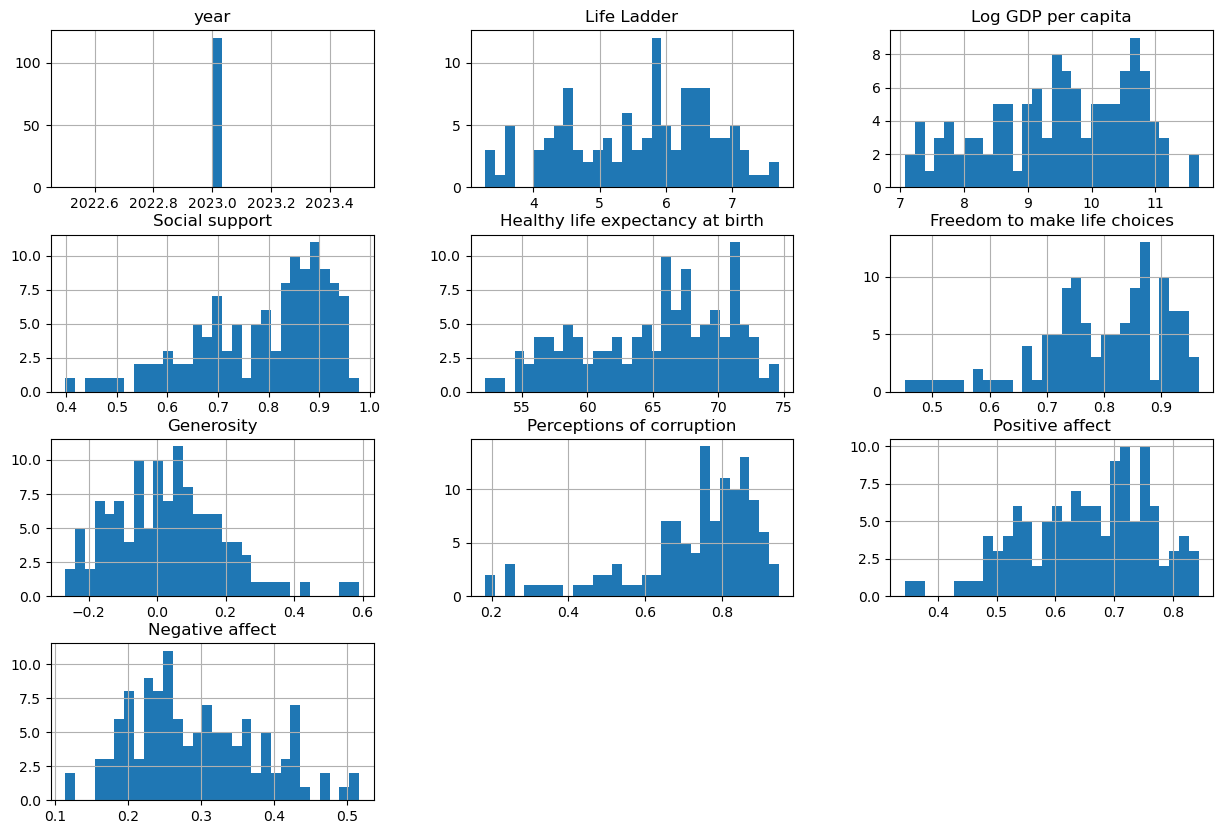

In [54]:
df2.hist(bins=30, figsize=(15, 10))
plt.show()

In [55]:
numerical_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 
                     'Healthy life expectancy at birth', 'Freedom to make life choices', 
                     'Generosity', 'Perceptions of corruption', 
                     'Positive affect', 'Negative affect']
X = df2[numerical_columns]

In [56]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

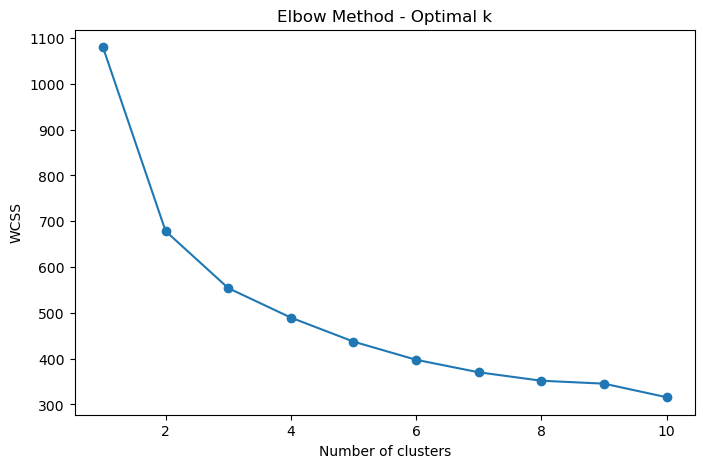

In [58]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_scaled)

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [92]:
print(df2[['Country name', 'Cluster']])

     Country name  Cluster
30        Albania        3
63      Argentina        3
80        Armenia        0
97      Australia        1
113       Austria        1
...           ...      ...
2260      Uruguay        3
2277   Uzbekistan        3
2313      Vietnam        3
2344       Zambia        2
2362     Zimbabwe        2

[120 rows x 2 columns]


C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


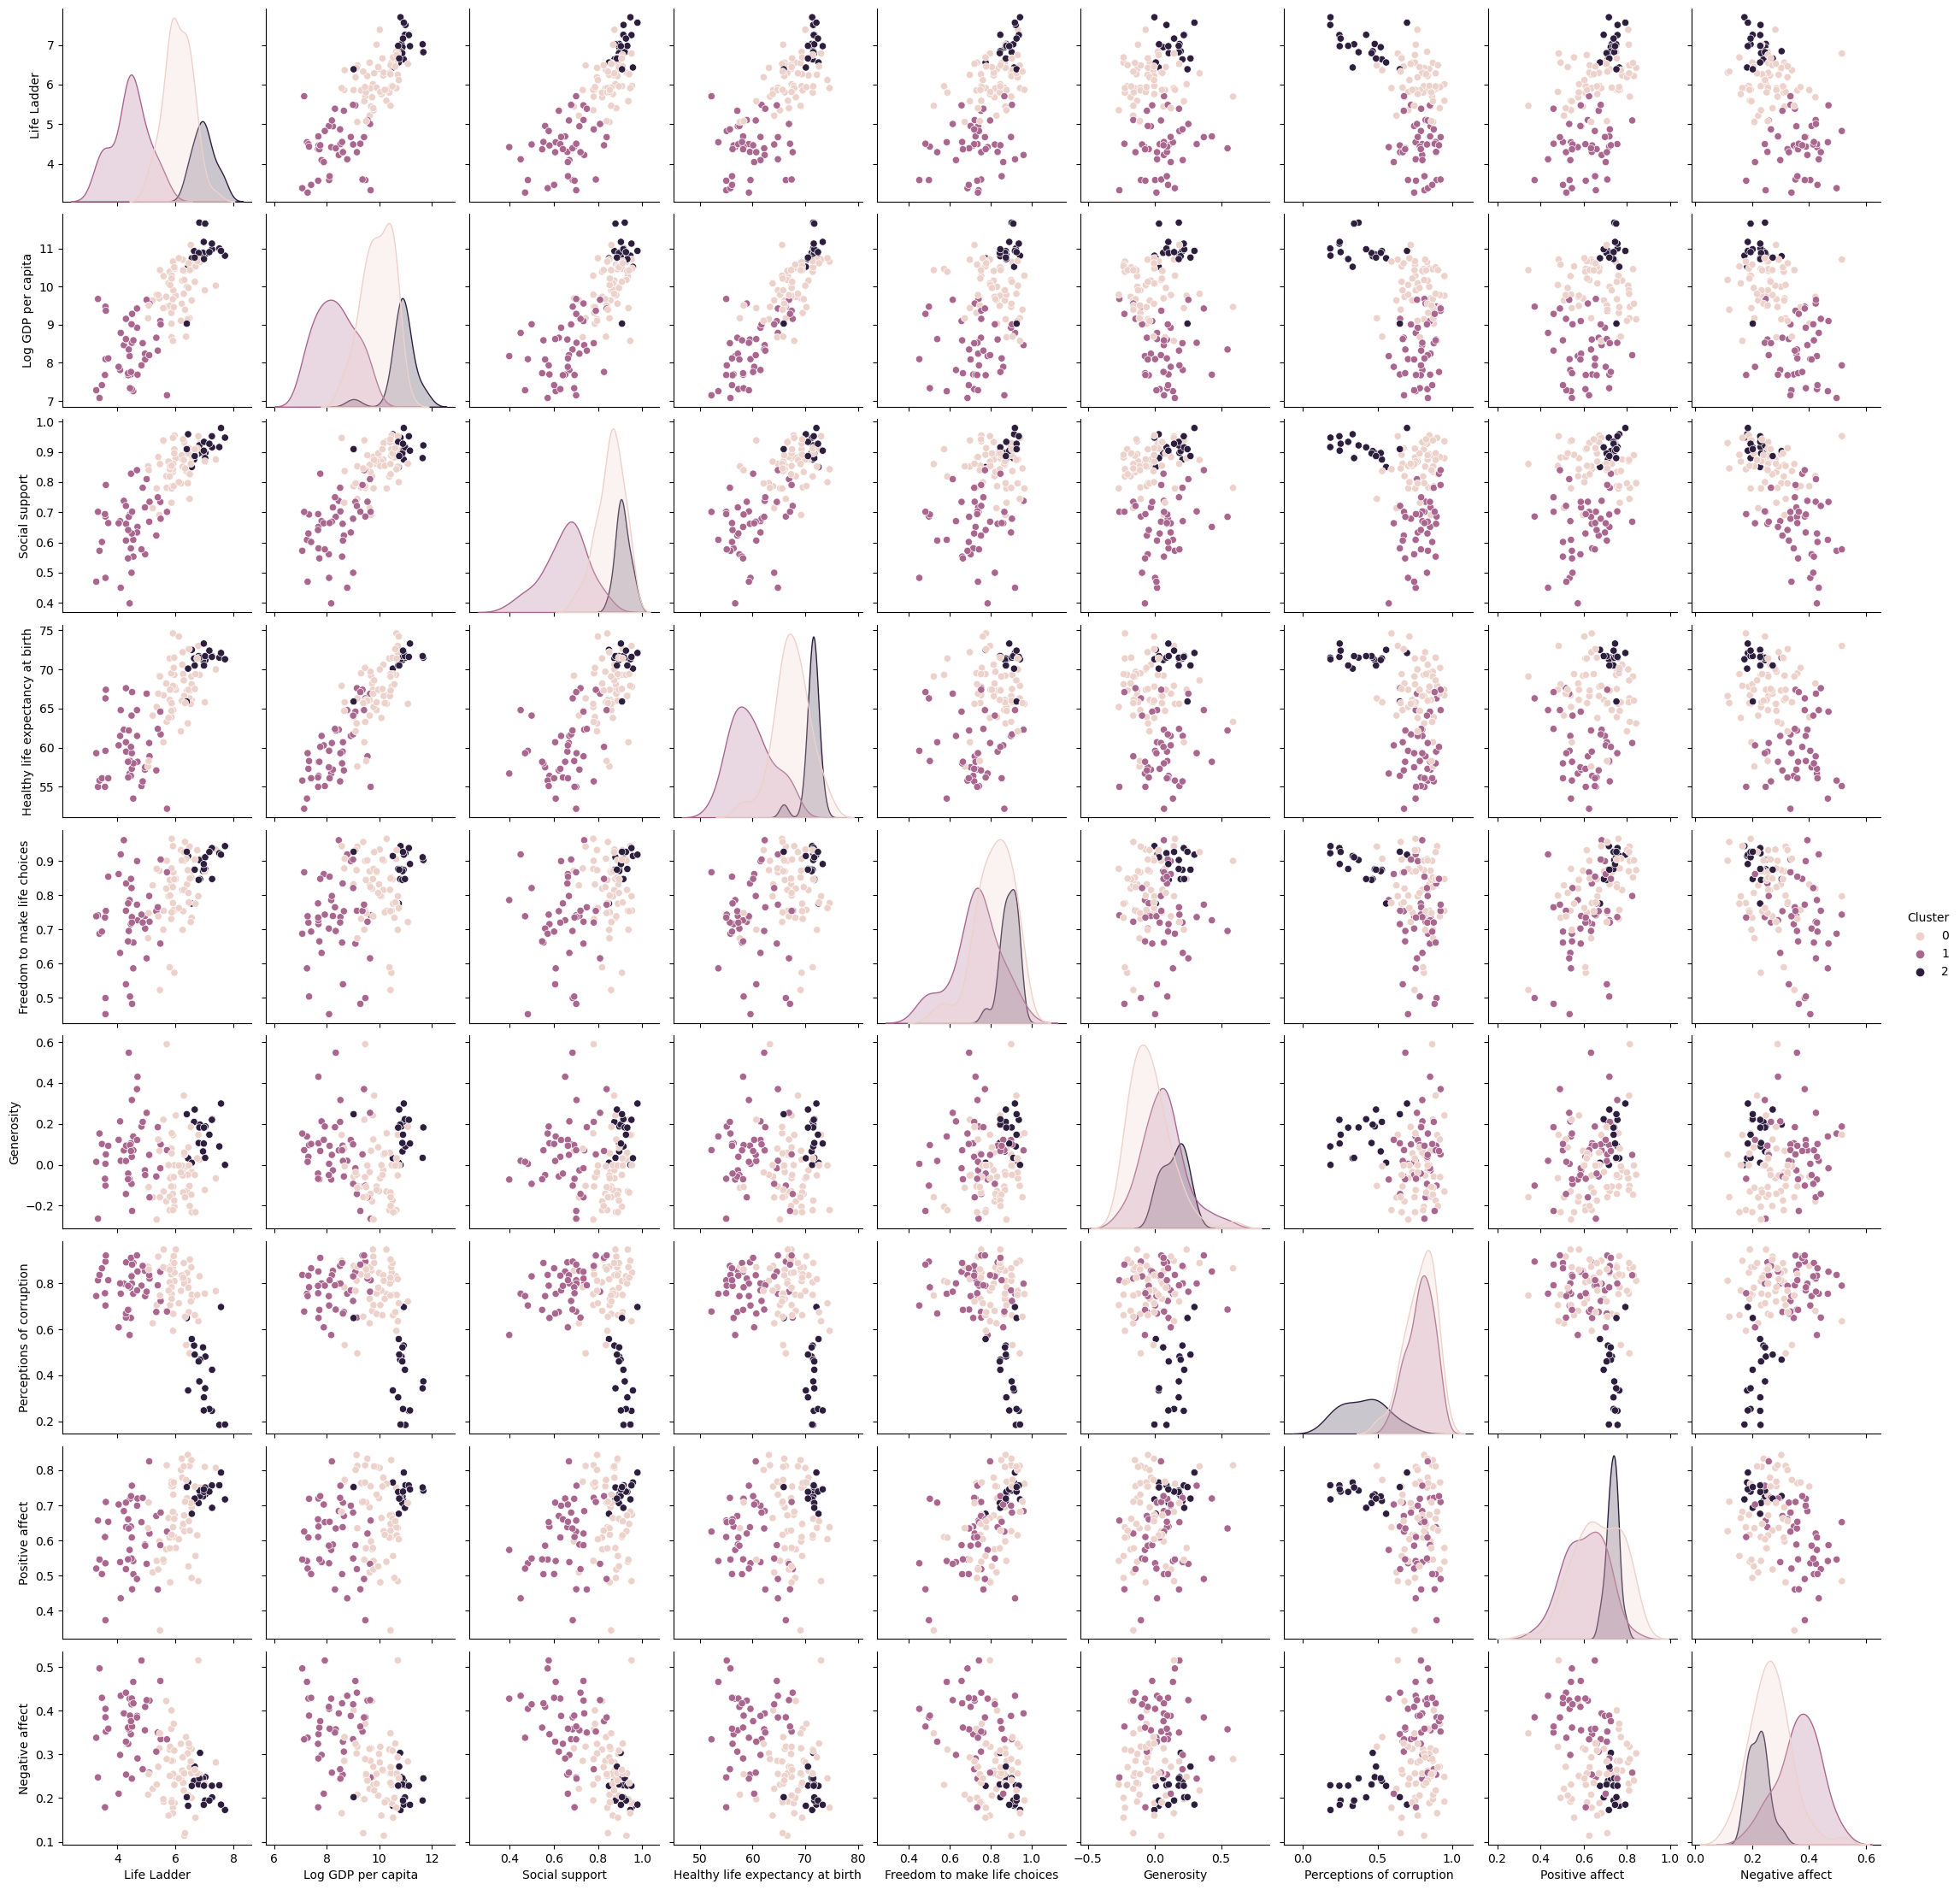

In [61]:
sns.pairplot(df2, hue='Cluster', vars=numerical_columns)
plt.show()

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

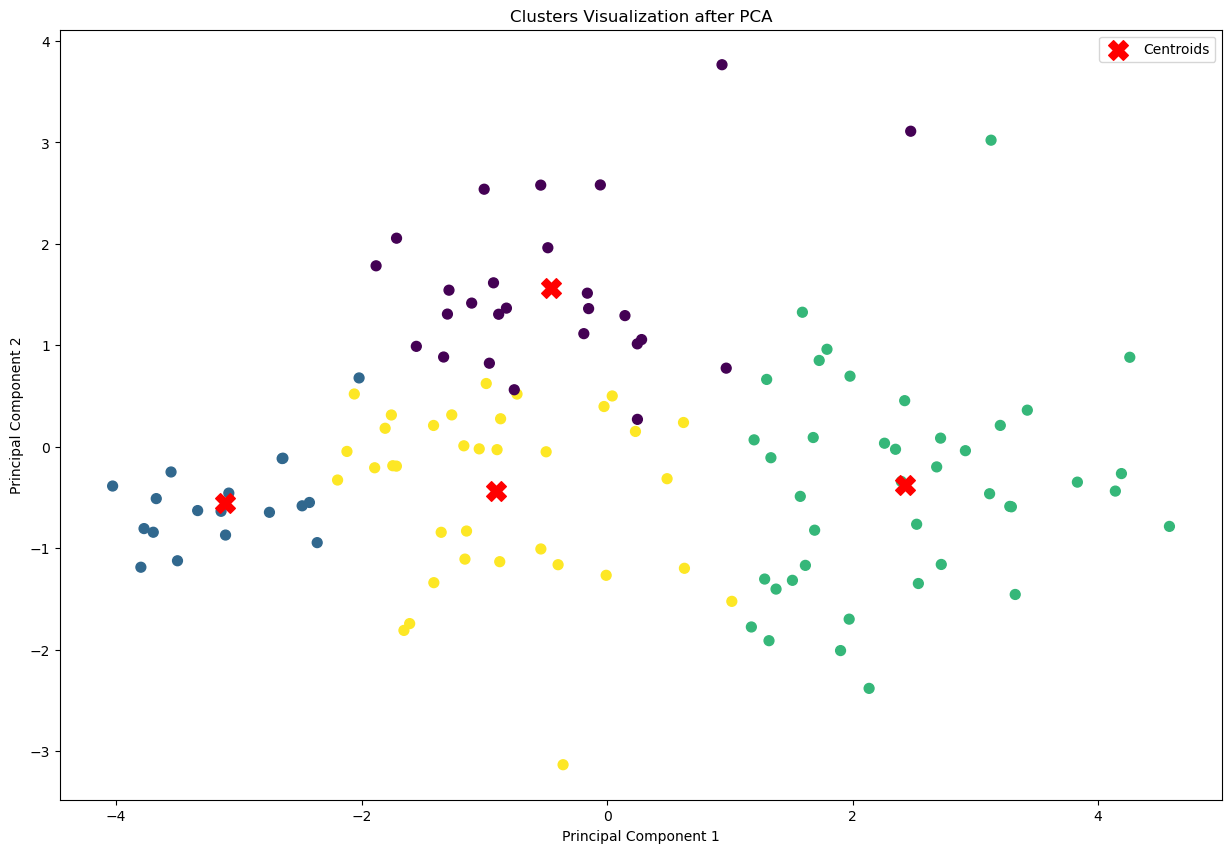

In [97]:
plt.figure(figsize=(15, 10))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

    
plt.title('Clusters Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

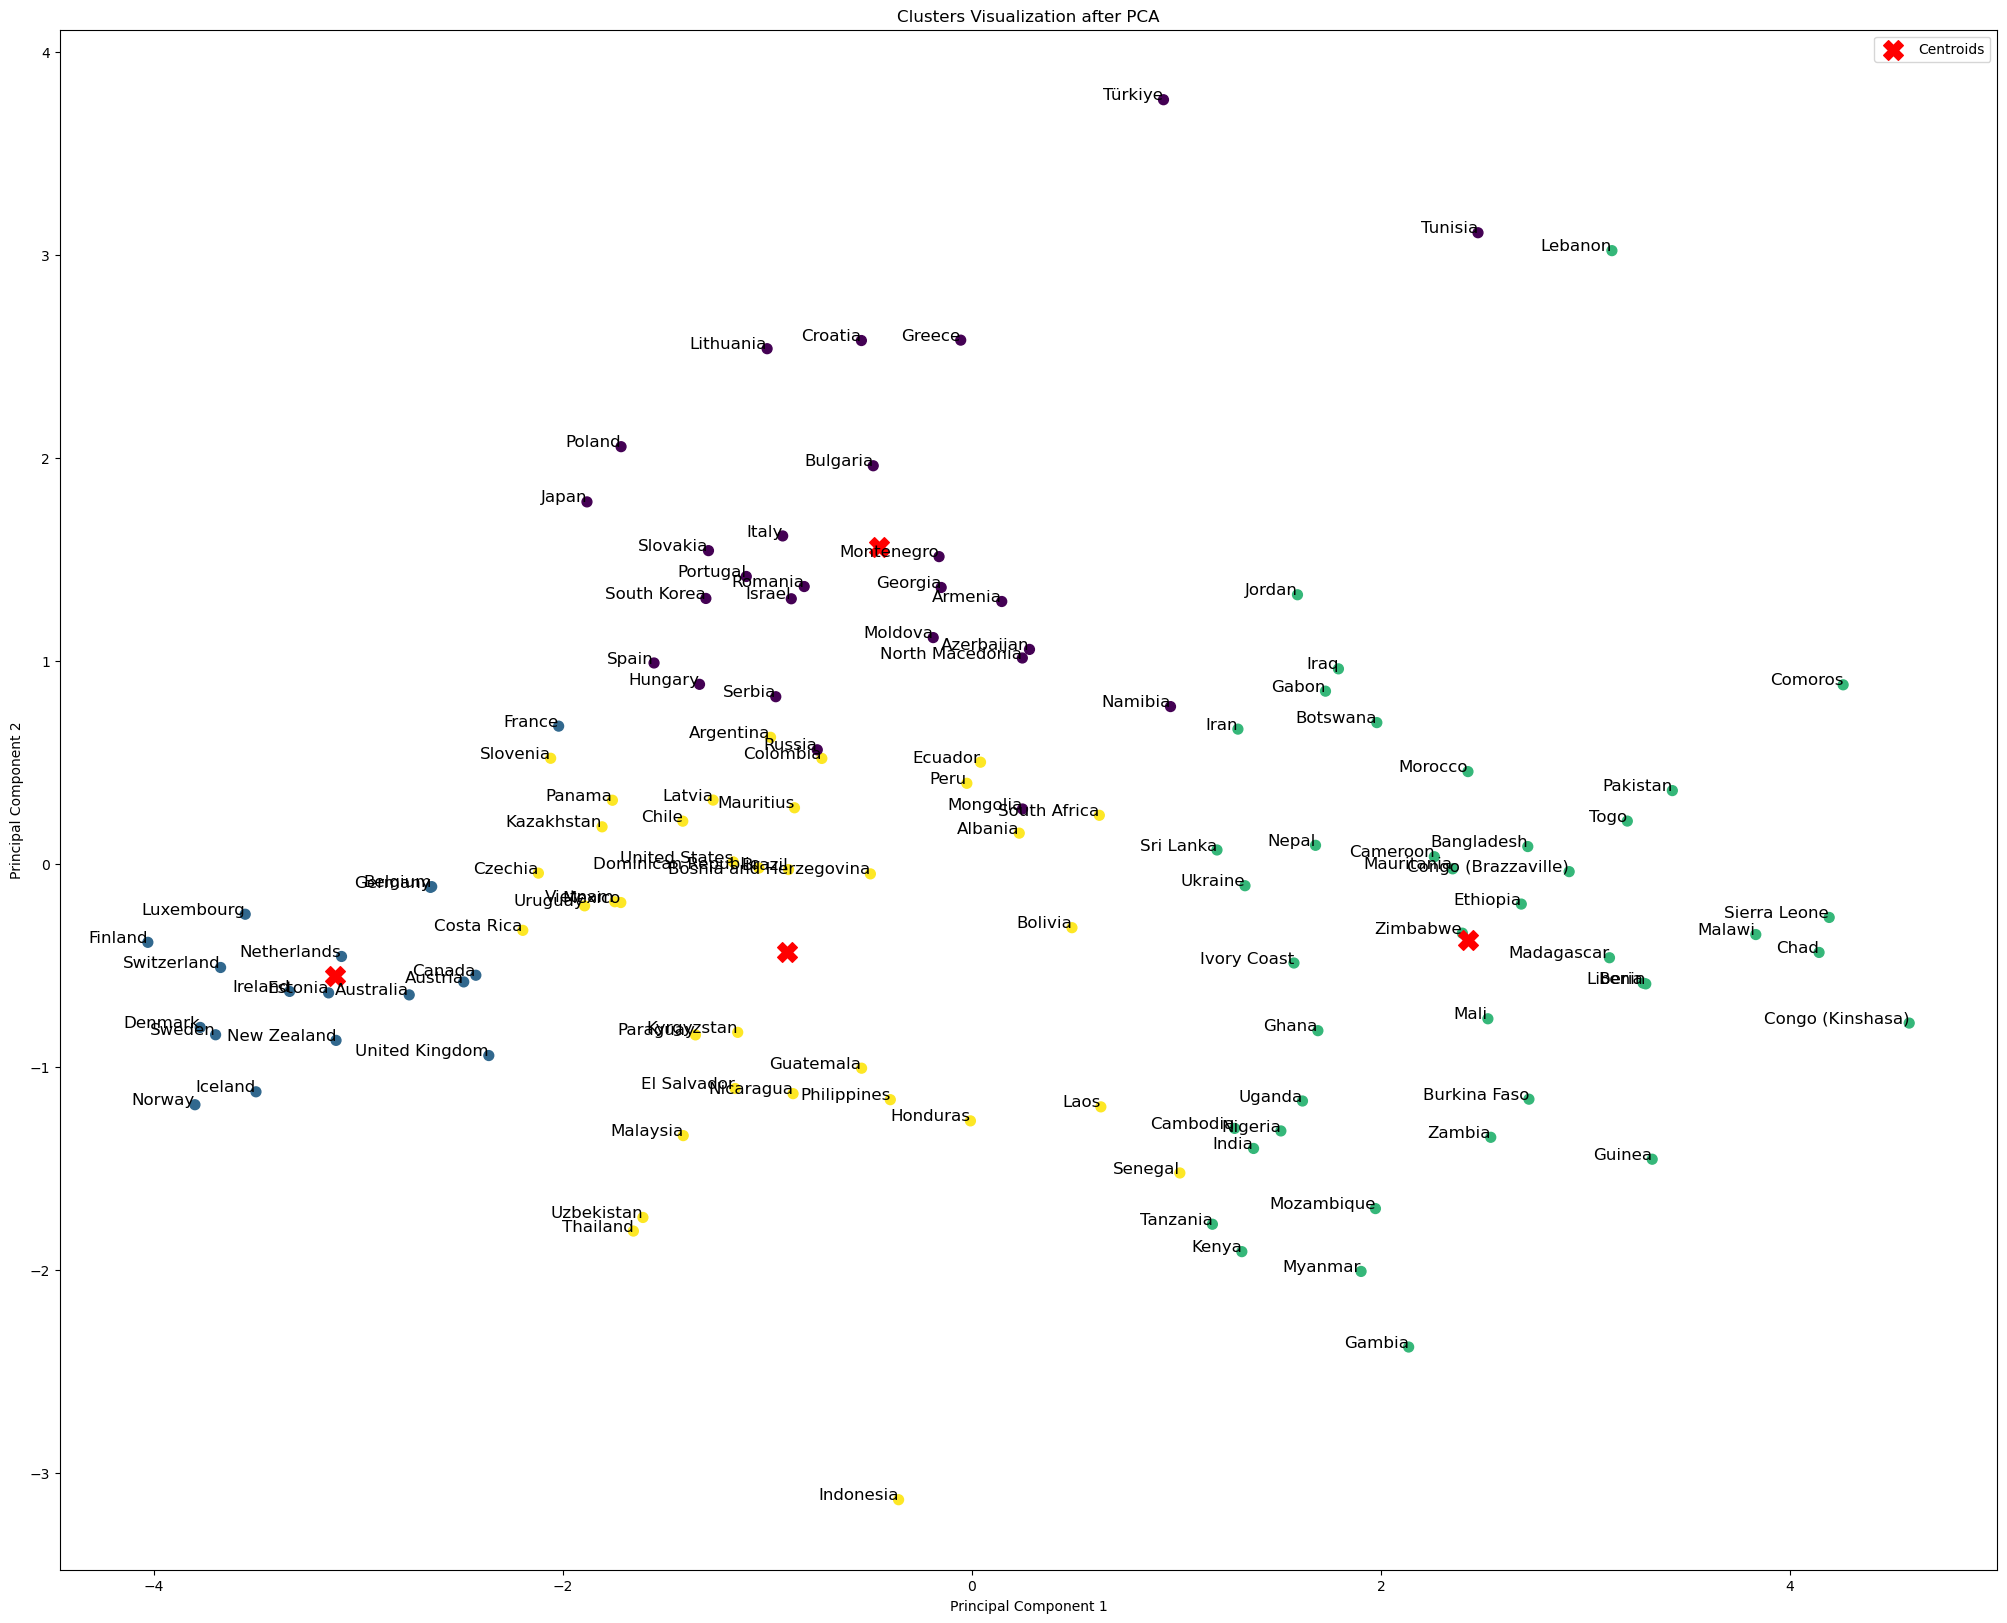

In [101]:
plt.figure(figsize=(25, 20))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
for i in range(len(df2)):
    plt.text(pca_data[i, 0], pca_data[i, 1], df2.iloc[i]['Country name'],
             fontsize=12, ha='right')
    
plt.title('Clusters Visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [102]:
df2['Country name', 'Cluster'].head()

KeyError: ('Country name', 'Cluster')